In [2]:
# Import libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load cleaned dataset

df = pd.read_csv("cleaned_insurance_data.csv")

3. **Analyse univariée :** Analysez chaque variable indépendamment.

- Age

In [3]:
# Descriptive statistics

round(df['age'].describe(), 2)

# Minimum age = 18, Maximum age = 64, Average age = 39, Age standard deviation = ± 14

count    1326.00
mean       39.21
std        14.05
min        18.00
25%        27.00
50%        39.00
75%        51.00
max        64.00
Name: age, dtype: float64

In [4]:
# Descriptive statistics (Median)

df['age'].median() 

# Median age = 39

np.float64(39.0)

In [5]:
# Descriptive statistics (Mode)

df['age'].mode() 

# The modal ages are 18 and 19, signifying a bimodal distribution 

0    18
1    19
Name: age, dtype: int64

Text(64.72222222222221, 0.5, 'Frequency')

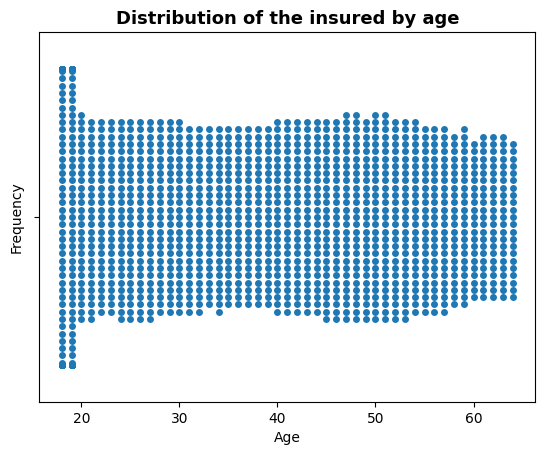

In [6]:
# Confirm bimodality with swarmplot

sns.swarmplot(data=df, x="age")
plt.title("Distribution of the insured by age", fontsize= 13, weight = "bold")
plt.xlabel("Age", weight = 10)
plt.ylabel("Frequency", weight = 10)

In [7]:
# Descriptive statistics (Range)

age_range = df['age'].max() - df['age'].min()

age_range

# Age range of the insured = 46

np.int64(46)

In [8]:
# Descriptive statistics (Co-efficient of Variation)

cov_age = df['age'].std() / df['age'].mean()

cov_age = round(cov_age,2) * 100

cov_age

# The CoV of the ages of the insured is 36%

np.float64(36.0)

- Sex

In [9]:
# Number of males and females insured

number_of_insured_by_sex = df['sex'].value_counts()

number_of_insured_by_sex

# 668 males and 658 females are insured by the company

sex
1    668
0    658
Name: count, dtype: int64

In [10]:
# Create dataframe for pie chart

pie_df = pd.DataFrame(number_of_insured_by_sex).reset_index()
pie_df['sex'] = pie_df['sex'].map({1 : "Male", 0 : "Female"})
pie_df['percentage'] = pie_df['count'] / pie_df['count'].sum() * 100

pie_df

,sex,count,percentage
0,Male,668,50.377074
1,Female,658,49.622926


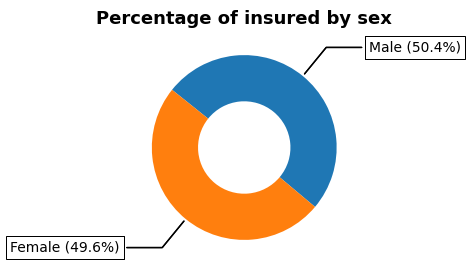

In [11]:
# Pie chart showing the percentage ratio of males to females

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

wedges, texts = ax.pie(pie_df['count'], wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(pie_df['sex'][i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

    label = f"{pie_df['sex'][i]} ({pie_df['percentage'][i]:.1f}%)"
    ax.annotate(
        label, 
        xy=(x, y), 
        xytext=(1.35 * np.sign(x), 1.4 * y),
        horizontalalignment=horizontalalignment, 
        **kw
    )

ax.set_title("Percentage of insured by sex", fontsize=13, weight="bold")

plt.show()

# Males represent 50.4% of the insured while females represent 49.6% of the insured. 

- BMI

In [12]:
# Descriptive statistics

round(df['bmi'].describe(), 2)

# Minimum bmi = 16, Maximum bmi = 47.7, Average bmi = 30.6, bmi standard deviation = ± 6

count    1326.00
mean       30.56
std         5.97
min        15.96
25%        26.22
50%        30.30
75%        34.49
max        47.74
Name: bmi, dtype: float64

In [13]:
# Descriptive statistics (Median)

df['bmi'].median() 

# Median age = 30.3

np.float64(30.3)

In [14]:
# Descriptive statistics (Mode)

df['bmi'].mode() 

# The modal BMI = 32.3, signifying a unimodal distribution 

0    32.3
Name: bmi, dtype: float64

Text(0.6944444444444446, 0.5, 'Frequency')

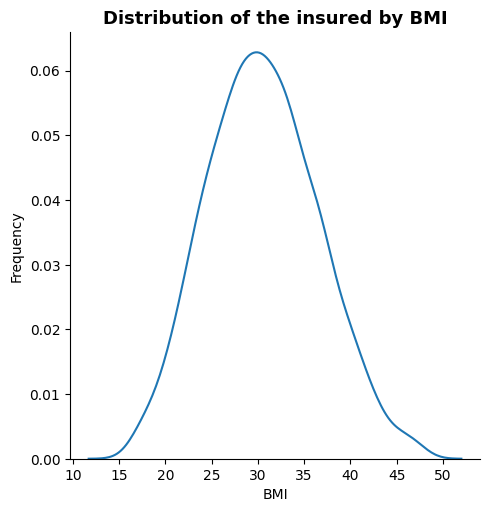

In [15]:
# Confirm mode with plot

sns.displot(df, x = 'bmi', kind='kde')
plt.title("Distribution of the insured by BMI", fontsize= 13, weight = "bold")
plt.xlabel("BMI", weight = 10)
plt.ylabel("Frequency", weight = 10)

In [16]:
# Descriptive statistics (Range)

bmi_range = df['bmi'].max() - df['bmi'].min()

bmi_range

# BMI range of the insured = 31.78

np.float64(31.78)

In [17]:
# Descriptive statistics (Co-efficient of Variation)

cov_bmi = df['bmi'].std() / df['bmi'].mean()

cov_bmi = round(cov_bmi, 2) * 100

cov_bmi

# The CoV of the BMI of the insured = 20%

np.float64(20.0)

- Children

In [18]:
# Descriptive statistics

round(df['children'].describe(), 2)

# Information on clients' number(s) of children 
# Minimum number of children = 0, Maximum number of children = 5, 
# Average number of children = 1, Number of chimdren standard deviation = ± 1

count    1326.00
mean        1.10
std         1.21
min         0.00
25%         0.00
50%         1.00
75%         2.00
max         5.00
Name: children, dtype: float64

In [19]:
# Descriptive statistics (Median)

df['children'].median() 

# Median number of children had by clients = 1

np.float64(1.0)

In [20]:
# Descriptive statistics (Mode)

df['children'].mode() 

# Most of the clients insured have no children
# Mode = 0

0    0
Name: children, dtype: int64

Text(5.069444444444445, 0.5, 'Frequency')

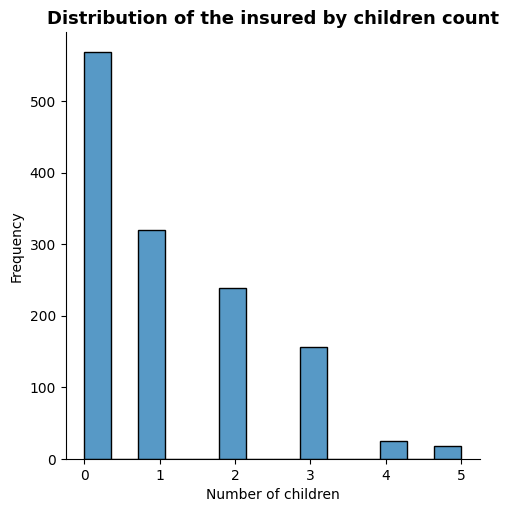

In [21]:
# Confirm mode with plot

sns.displot(df, x = 'children', kind='hist')
plt.title("Distribution of the insured by children count", fontsize= 13, weight = "bold")
plt.xlabel("Number of children", weight = 10)
plt.ylabel("Frequency", weight = 10)

In [22]:
# Descriptive statistics (Range)

children_no_range = df['children'].max() - df['children'].min()

children_no_range

# children_no_range of the insured = 5

np.int64(5)

In [23]:
# Descriptive statistics (Co-efficient of Variation)

cov_children = df['children'].std() / df['children'].mean()

cov_children = round(cov_children, 2) * 100

cov_children

# The CoV of the number of children of the insured = 110%

np.float64(110.00000000000001)

In [24]:
number_of_children_by_insured = df['children'].value_counts()

number_of_children_by_insured

children
0    568
1    320
2    239
3    156
4     25
5     18
Name: count, dtype: int64

In [25]:
# Create dataframe for pie chart

pie_df_children = pd.DataFrame(number_of_children_by_insured).reset_index()
pie_df_children['percentage'] = round(pie_df_children['count'] / pie_df_children['count'].sum() * 100, 2)

shuffled_pie_df_children = pie_df_children.sample(frac=1, random_state=75).reset_index(drop=True)

shuffled_pie_df_children

,children,count,percentage
0,2,239,18.02
1,4,25,1.89
2,1,320,24.13
3,3,156,11.76
4,5,18,1.36
5,0,568,42.84


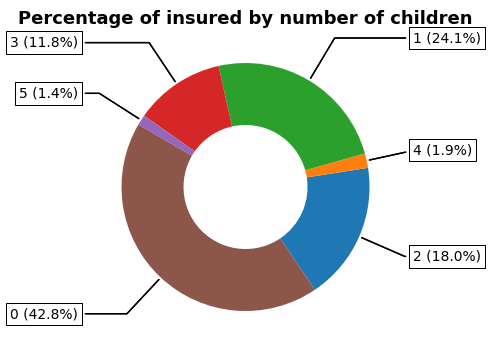

In [26]:
# Pie chart showing the percentage ratio by number of children

fig, ax = plt.subplots(figsize=(4, 7), subplot_kw=dict(aspect="equal"))

wedges, texts = ax.pie(shuffled_pie_df_children['count'], wedgeprops=dict(width=0.5), startangle=-56)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(shuffled_pie_df_children['children'][i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

    label = f"{shuffled_pie_df_children['children'][i]} ({shuffled_pie_df_children['percentage'][i]:.1f}%)"
    ax.annotate(
        label, 
        xy=(x, y), 
        xytext=(1.35 * np.sign(x), 1.4 * y),
        horizontalalignment=horizontalalignment, 
        **kw
    )

ax.set_title("Percentage of insured by number of children", fontsize = 13, weight = "bold")

plt.show()

- Smokers

In [27]:
# Number of smokers vs non-smokers insured

number_of_insured_by_smoking_habit = df['smoker'].value_counts()

number_of_insured_by_smoking_habit

# Number of smokers = 1060 
# Number of non-smokers = 255

smoker
0    1060
1     266
Name: count, dtype: int64

In [28]:
# Create dataframe for pie chart

pie_df_smoker = pd.DataFrame(number_of_insured_by_smoking_habit).reset_index()
pie_df_smoker['smoker'] = pie_df_smoker['smoker'].map({ 1 : "Smoker", 0 : "Non-smoker"})
pie_df_smoker['percentage'] = pie_df_smoker['count'] / pie_df_smoker['count'].sum() * 100

pie_df_smoker

,smoker,count,percentage
0,Non-smoker,1060,79.939668
1,Smoker,266,20.060332


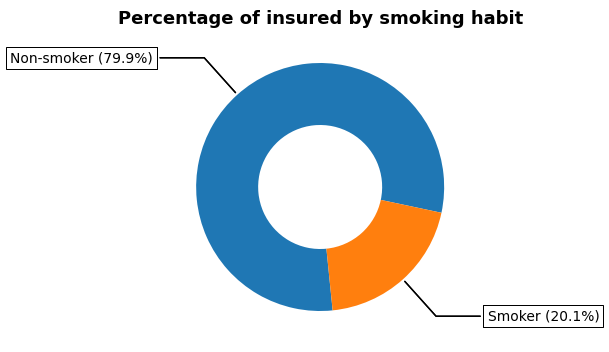

In [29]:
# Pie chart showing the percentage ratio by number of children

fig, ax = plt.subplots(figsize=(4, 7), subplot_kw=dict(aspect="equal"))

wedges, texts = ax.pie(pie_df_smoker['count'], wedgeprops=dict(width=0.5), startangle=-12)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(pie_df_smoker['smoker'][i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

    label = f"{pie_df_smoker['smoker'][i]} ({pie_df_smoker['percentage'][i]:.1f}%)"
    ax.annotate(
        label, 
        xy=(x, y), 
        xytext=(1.35 * np.sign(x), 1.4 * y),
        horizontalalignment=horizontalalignment, 
        **kw
    )

ax.set_title("Percentage of insured by smoking habit", fontsize = 13, weight = "bold")

plt.show()

- Region

In [30]:
# Confirm the number of regions in dataset

df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [31]:
# Number of smokers vs non-smokers insured

number_of_insured_by_region = df['region'].value_counts()

number_of_insured_by_region

# southeast = 358, southwest = 323, northwest = 323, northeast = 322

region
southeast    358
southwest    323
northwest    323
northeast    322
Name: count, dtype: int64

In [32]:
# Create dataframe for pie chart

pie_df_region = pd.DataFrame(number_of_insured_by_region).reset_index()
pie_df_region['percentage'] = pie_df_region['count'] / pie_df_region['count'].sum() * 100

pie_df_region

,region,count,percentage
0,southeast,358,26.998492
1,southwest,323,24.358974
2,northwest,323,24.358974
3,northeast,322,24.283560


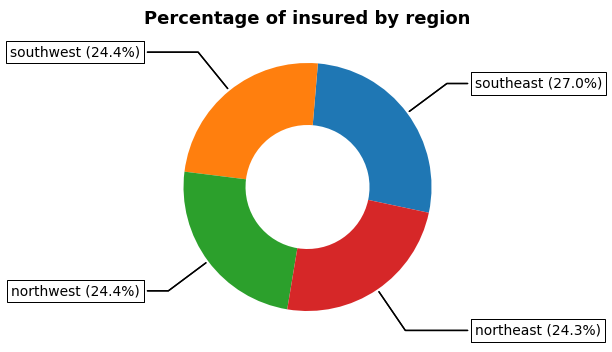

In [33]:
# Pie chart showing the percentage ratio of the insured by region

fig, ax = plt.subplots(figsize=(4, 7), subplot_kw=dict(aspect="equal"))

wedges, texts = ax.pie(pie_df_region['count'], wedgeprops=dict(width=0.5), startangle=-12)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(pie_df_region['region'][i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

    label = f"{pie_df_region['region'][i]} ({pie_df_region['percentage'][i]:.1f}%)"
    ax.annotate(
        label, 
        xy=(x, y), 
        xytext=(1.35 * np.sign(x), 1.4 * y),
        horizontalalignment=horizontalalignment, 
        **kw
    )

ax.set_title("Percentage of insured by region", fontsize = 13, weight = "bold")

plt.show()

- Charge

In [34]:
# Descriptive statistics

round(df['charges'].describe(), 2)

# Minimum charge = 1121.87, Maximum charge = 49577.66, Average charge = 13033.96, Charge standard deviation = ± 11680.81

count     1326.00
mean     13033.96
std      11680.81
min       1121.87
25%       4724.37
50%       9296.02
75%      16389.83
max      49577.66
Name: charges, dtype: float64

In [35]:
# Descriptive statistics (Median)

round(df['charges'].median(), 2)

# Median charge = 9296.02

np.float64(9296.02)

In [36]:
# Descriptive statistics (Mode)

round(df['charges'].mode(), 2)

# Modal charge = 1639.56

0    1639.56
Name: charges, dtype: float64

Text(5.069444444444445, 0.5, 'Frequency')

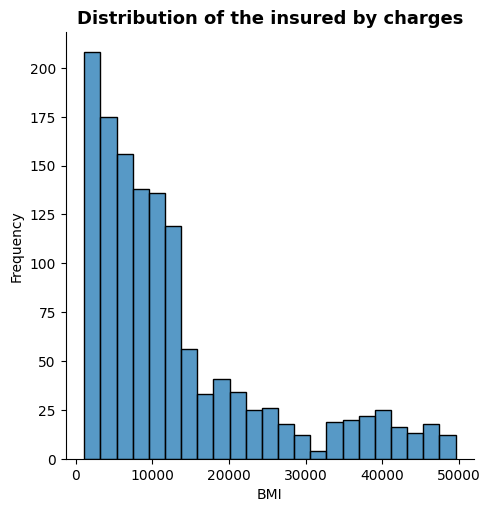

In [37]:
# Confirm mode with plot

sns.displot(df, x = 'charges', kind='hist')
plt.title("Distribution of the insured by charges", fontsize= 13, weight = "bold")
plt.xlabel("BMI", weight = 10)
plt.ylabel("Frequency", weight = 10)

In [38]:
# Descriptive statistics (Range)

round(df['charges'].max() - df['charges'].min(), 2)

# Charge range = 48455.79

np.float64(48455.79)

In [39]:
# Descriptive statistics (Co-efficient of Variation)

cov_charges = df['charges'].std() / df['charges'].mean()

cov_charges = round(cov_charges, 2) * 100

cov_charges

# The CoV of the number of children of the insured = 90%

np.float64(90.0)

In [40]:
cov_outputs = [cov_age, cov_bmi, cov_children, cov_charges]

df_cov_plot = pd.DataFrame({"Parameters" : ["Age", "BMI", "Children", "Charges"], "CoV": cov_outputs})

df_cov_plot

,Parameters,CoV
0,Age,36.0
1,BMI,20.0
2,Children,110.0
3,Charges,90.0


Text(0, 0.5, 'CoV (%)')

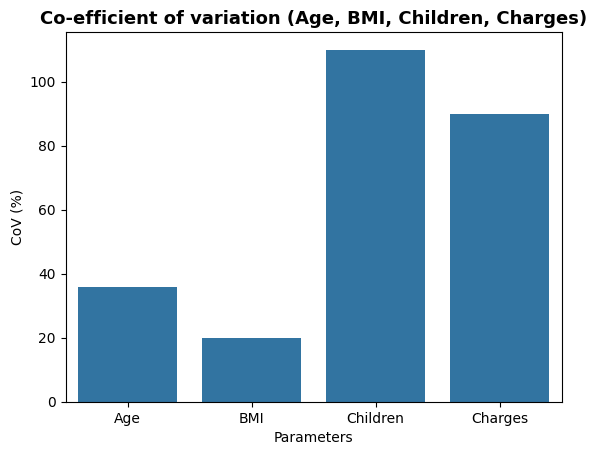

In [41]:
sns.barplot(data=df_cov_plot, x = 'Parameters', y = 'CoV')
plt.title("Co-efficient of variation (Age, BMI, Children, Charges)", fontsize= 13, weight = "bold")
plt.xlabel("Parameters", weight = 10)
plt.ylabel("CoV (%)", weight = 10)

4. **Corrélation des variables :** Étudiez les corrélations avec la variable cible.

In [42]:
# Duplicate dataframe

df_for_cor = df.copy()

In [43]:
# Hot encode region column

df_for_cor['is_southwest'] = df_for_cor['region'].apply(lambda x: 1 if x == "southwest" else 0)
df_for_cor['is_southeast'] = df_for_cor['region'].apply(lambda x: 1 if x == "southeast" else 0)
df_for_cor['is_northwest'] = df_for_cor['region'].apply(lambda x: 1 if x == "northwest" else 0)
df_for_cor['is_northeast'] = df_for_cor['region'].apply(lambda x: 1 if x == "northeast" else 0)

In [44]:
# Categorize bmi for granularity of analysis

def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'underweight'
    elif 18.5 <= bmi < 25:
        return 'normal_weight'
    elif 25 <= bmi < 30:
        return 'overweight'
    else:
        return 'obese'

df_for_cor['bmi_category'] = df_for_cor['bmi'].apply(categorize_bmi)

In [45]:
# One encode BMI
df_for_cor['is_underweight'] = df_for_cor['bmi_category'].apply(lambda x: 1 if x == "underweight" else 0)
df_for_cor['is_normal_weight'] = df_for_cor['bmi_category'].apply(lambda x: 1 if x == "normal_weight" else 0)
df_for_cor['is_overweight'] = df_for_cor['bmi_category'].apply(lambda x: 1 if x == "overweight" else 0)
df_for_cor['is_obese'] = df_for_cor['bmi_category'].apply(lambda x: 1 if x == "obese" else 0)

In [46]:
# Drop dataframe index
df_for_cor.drop('Unnamed: 0', inplace=True, axis=1)

df_for_cor

,age,sex,bmi,children,smoker,region,charges,is_southwest,is_southeast,is_northwest,is_northeast,bmi_category,is_underweight,is_normal_weight,is_overweight,is_obese
0,19,0,27.90,0,1,southwest,16884.92,1,0,0,0,overweight,0,0,1,0
1,18,1,33.77,1,0,southeast,1725.55,0,1,0,0,obese,0,0,0,1
2,28,1,33.00,3,0,southeast,4449.46,0,1,0,0,obese,0,0,0,1
3,33,1,22.70,0,0,northwest,21984.47,0,0,1,0,normal_weight,0,1,0,0
4,32,1,28.88,0,0,northwest,3866.86,0,0,1,0,overweight,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1321,50,1,30.97,3,0,northwest,10600.55,0,0,1,0,obese,0,0,0,1
1322,18,0,31.92,0,0,northeast,2205.98,0,0,0,1,obese,0,0,0,1
1323,18,0,36.85,0,0,southeast,1629.83,0,1,0,0,obese,0,0,0,1
1324,21,0,25.80,0,0,southwest,2007.94,1,0,0,0,overweight,0,0,1,0


In [47]:
# Log-transform charges and age data (positively-skewed)

df_for_cor['bmi_log'] = df_for_cor['bmi'].apply(lambda x: np.log(x + 1))
df_for_cor['charges_log'] = df_for_cor['charges'].apply(lambda x: np.log(x + 1))
df_for_cor['age_log'] = df_for_cor['age'].apply(lambda x: np.log(x + 1))
df_for_cor['children_log'] = df_for_cor['children'].apply(lambda x: np.log(x + 1))
df_for_cor['smoker_log'] = df_for_cor['smoker'].apply(lambda x: np.log(x + 1))

df_for_cor

,age,sex,bmi,children,smoker,region,charges,is_southwest,is_southeast,is_northwest,...,bmi_category,is_underweight,is_normal_weight,is_overweight,is_obese,bmi_log,charges_log,age_log,children_log,smoker_log
0,19,0,27.90,0,1,southwest,16884.92,1,0,0,...,overweight,0,0,1,0,3.363842,9.734235,2.995732,0.000000,0.693147
1,18,1,33.77,1,0,southeast,1725.55,0,1,0,...,obese,0,0,0,1,3.548755,7.453880,2.944439,0.693147,0.000000
2,28,1,33.00,3,0,southeast,4449.46,0,1,0,...,obese,0,0,0,1,3.526361,8.400763,3.367296,1.386294,0.000000
3,33,1,22.70,0,0,northwest,21984.47,0,0,1,...,normal_weight,0,1,0,0,3.165475,9.998137,3.526361,0.000000,0.000000
4,32,1,28.88,0,0,northwest,3866.86,0,0,1,...,overweight,0,0,1,0,3.397189,8.260457,3.496508,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1321,50,1,30.97,3,0,northwest,10600.55,0,0,1,...,obese,0,0,0,1,3.464798,9.268755,3.931826,1.386294,0.000000
1322,18,0,31.92,0,0,northeast,2205.98,0,0,0,...,obese,0,0,0,1,3.494080,7.699380,2.944439,0.000000,0.000000
1323,18,0,36.85,0,0,southeast,1629.83,0,1,0,...,obese,0,0,0,1,3.633631,7.396844,2.944439,0.000000,0.000000
1324,21,0,25.80,0,0,southwest,2007.94,1,0,0,...,overweight,0,0,1,0,3.288402,7.605362,3.091042,0.000000,0.000000


In [48]:
# Standardize numerical data
df_for_cor['bmi_std'] = (df_for_cor['bmi'] - df_for_cor['bmi'].mean())/ df_for_cor['bmi'].std()
df_for_cor['charges_std'] = (df_for_cor['charges'] - df_for_cor['charges'].mean())/ df_for_cor['charges'].std()
df_for_cor['age_std'] = (df_for_cor['age'] - df_for_cor['age'].mean())/ df_for_cor['age'].std()
df_for_cor['children_std'] = (df_for_cor['children'] - df_for_cor['children'].mean())/ df_for_cor['children'].std()

In [49]:
# Define numerical and binary categorical data
numerical_columns = ['bmi_std', 'age_std', 'children_std', 'charges_std',
                     'bmi_log', 'age_log', 'children_log', 'charges_log']
binary_columns = ['sex', 'smoker', 'is_underweight', 'is_normal_weight',
                  'is_overweight', 'is_obese', 'is_southwest', 'is_southeast', 'is_northwest', 'is_northeast']

# Compute Pearson correlations for numerical data
pearson_corr = df_for_cor[numerical_columns].corr()

# Compute Point Biserial correlations for binary vs numerical
from scipy.stats import pointbiserialr

biserial_corr = pd.DataFrame(
    [[pointbiserialr(df_for_cor[cat], df_for_cor[num])[0] for num in numerical_columns] for cat in binary_columns],
    index=binary_columns, columns=numerical_columns
)

# Transpose biserial_corr to append correctly
biserial_corr_t = biserial_corr.T

# Combine numerical vs numerical and binary vs numerical correlations
combined_corr = pd.concat([pearson_corr, biserial_corr_t], axis=1)
combined_corr = pd.concat([combined_corr, biserial_corr], axis=0)

# Fill diagonal with 1.0 (self-correlation)
for col in combined_corr.columns:
    if col in combined_corr.index:
        combined_corr.loc[col, col] = 1.0

# Combine numerical vs numerical and binary vs numerical correlations
combined_corr = pd.concat([pearson_corr, biserial_corr_t], axis=1)
combined_corr = pd.concat([combined_corr, biserial_corr], axis=0)


In [50]:
# Compute Pearson correlations for categorical data

binary_corr_matrix = df_for_cor[binary_columns].corr(method='pearson')

binary_corr_matrix_df = pd.DataFrame(binary_corr_matrix)

In [51]:
# Fill NaNs with their respective correlation coefficients

combined_corr.fillna(binary_corr_matrix_df, inplace=True)

In [52]:
# Drop any other column with NaNs

combined_corr.dropna(inplace=True, axis = 1)

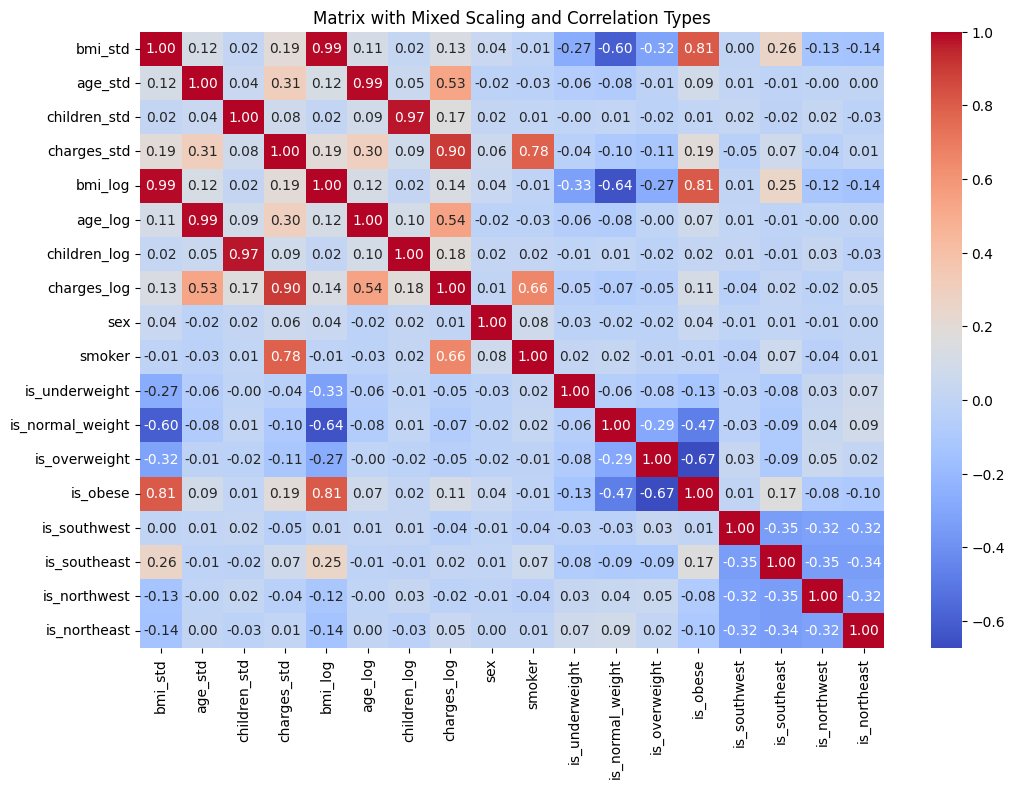

In [53]:
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(combined_corr, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=True, yticklabels=True)
plt.title("Matrix with Mixed Scaling and Correlation Types")
plt.show()

In [54]:
# from scipy.stats import pointbiserialr
# from scipy.stats import pearsonr

# Check for check for p-values to confirm significance
# is_obese_correlation, is_obese_p_value = pointbiserialr(df_for_cor['is_obese'], df_for_cor['charges_log'])
# bmi_std_correlation, bmi_std_p_value = pearsonr(df_for_cor['bmi_std'], df_for_cor['charges_log'])

# print(f"Point Biserial Correlation: {is_obese_correlation}")
# print(f"P-value: {is_obese_p_value}")

5. **Analyse bivariée :** Exemple : interaction entre sexe et fumeur.

In [55]:
# Duplicate latest dataframe with newly additional columns
df_for_bivariate_analysis = df_for_cor.copy()

In [56]:
# Return smoker and sex columns to their original values
# Create new columns for their encoded versions
df_for_bivariate_analysis['sex'] = df_for_bivariate_analysis['sex'].map({0: "female", 1: "male"})
df_for_bivariate_analysis['sex_encode'] = df_for_bivariate_analysis['sex'].map({"female" : 0, "male": 1})
df_for_bivariate_analysis['smoker'] = df_for_bivariate_analysis['smoker'].map({0: "no", 1: "yes"})
df_for_bivariate_analysis['smoker_encode'] = df_for_bivariate_analysis['smoker'].map({"no" : 0, "yes": 1})
df_for_bivariate_analysis['weight_category'] = df_for_cor['bmi_category']

In [57]:
# Re-order dataframe
df_for_bivariate_analysis = df_for_bivariate_analysis[['age', 'sex', 'bmi', 'weight_category', 'children', 'smoker', 'region', 'charges',
                              'age_std', 'age_log', 'sex_encode', 'bmi_std', 'bmi_log', 'children_std', 'children_log',
                              'smoker_encode', 'is_southwest',	'is_southeast',	'is_northwest', 'is_northeast', 'charges_std', 'charges_log']]

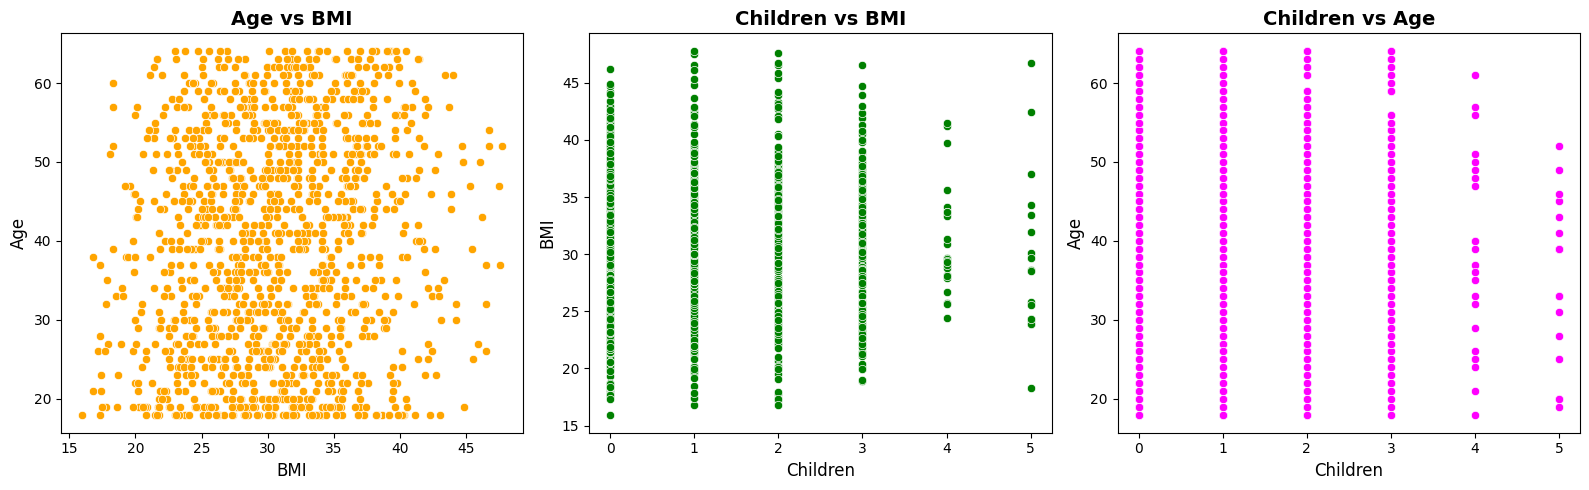

In [58]:
# Create a figure with 3 subplots in 1 row
fig, axes = plt.subplots(1, 3, figsize=(16, 5), sharey=False)

# Scatter plot: age vs bmi
sns.scatterplot(data=df_for_bivariate_analysis, x='bmi', y='age', ax=axes[0], color='orange')
axes[0].set_title('Age vs BMI', fontsize=14, weight='bold')
axes[0].set_xlabel('BMI', fontsize=12, weight='normal')
axes[0].set_ylabel('Age', fontsize=12, weight='normal')

# Scatter plot: children vs bmi
sns.scatterplot(data=df_for_bivariate_analysis, x='children', y='bmi', ax=axes[1], color='green')
axes[1].set_title('Children vs BMI', fontsize=14, weight='bold')
axes[1].set_xlabel('Children', fontsize=12, weight='normal')
axes[1].set_ylabel('BMI', fontsize=12, weight='normal')

# Scatter plot: children vs age
sns.scatterplot(data=df_for_bivariate_analysis, x='children', y='age', ax=axes[2], color='magenta')
axes[2].set_title('Children vs Age', fontsize=14, weight='bold')
axes[2].set_xlabel('Children', fontsize=12, weight='normal')
axes[2].set_ylabel('Age', fontsize=12, weight='normal')

# Adjust layout
plt.tight_layout()
plt.show()


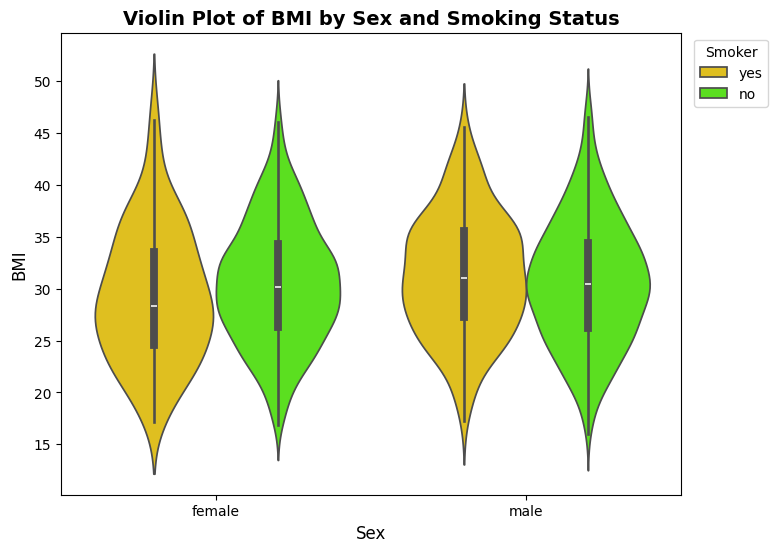

In [59]:
# Generates 6 distinct colors
colors = sns.color_palette("hsv", 6)  
sns.set_palette(colors)

# Create a violin plot with hue to compare male and female
plt.figure(figsize=(8, 6))
sns.violinplot(data=df_for_bivariate_analysis, x='sex', y='bmi', hue='smoker')
plt.title('Violin Plot of BMI by Sex and Smoking Status', fontsize=14, weight='bold')
plt.xlabel('Sex', fontsize=12)
plt.ylabel('BMI', fontsize=12)
plt.legend(title='Smoker', loc='upper left', bbox_to_anchor=(1.01, 1), fontsize=10)
plt.show()

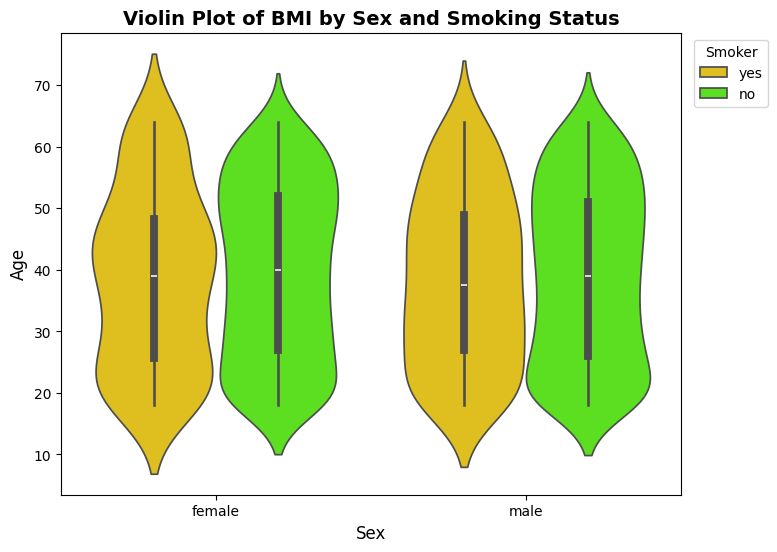

In [60]:
# Create a violin plot with hue to compare male and female
plt.figure(figsize=(8, 6))
sns.violinplot(data=df_for_bivariate_analysis, x='sex', y='age', hue='smoker')
plt.title('Violin Plot of BMI by Sex and Smoking Status', fontsize=14, weight='bold')
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.legend(title='Smoker', loc='upper left', bbox_to_anchor=(1.01, 1), fontsize=10)
plt.show()

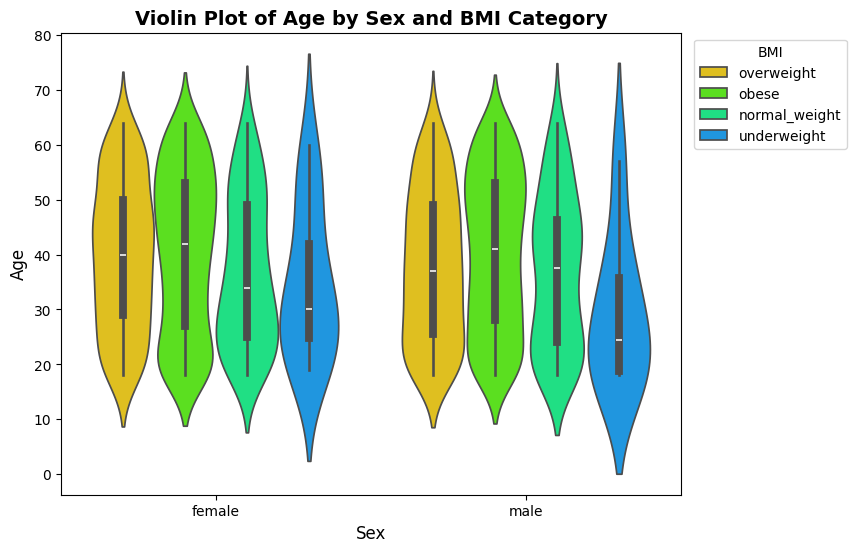

In [61]:
# Create a violin plot with hue to compare male and female
plt.figure(figsize=(8, 6))
sns.violinplot(data=df_for_bivariate_analysis, x='sex', y='age', hue='weight_category')
plt.title('Violin Plot of Age by Sex and BMI Category', fontsize=14, weight='bold')
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.legend(title='BMI', loc='upper left', bbox_to_anchor=(1.01, 1), fontsize=10)
plt.show()

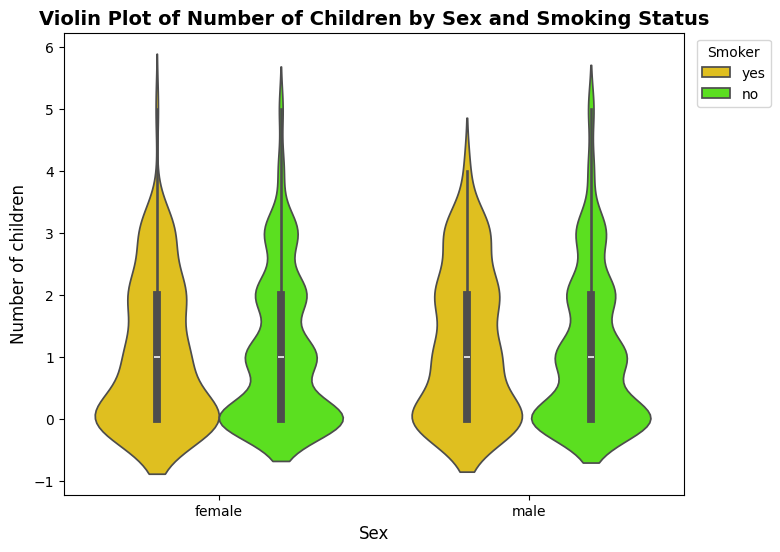

In [62]:
# Create a violin plot with hue to compare male and female
plt.figure(figsize=(8, 6))
sns.violinplot(data=df_for_bivariate_analysis, x='sex', y='children', hue='smoker')
plt.title('Violin Plot of Number of Children by Sex and Smoking Status', fontsize=14, weight='bold')
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Number of children', fontsize=12)
plt.legend(title='Smoker', loc='upper left', bbox_to_anchor=(1.01, 1), fontsize=10)
plt.show()

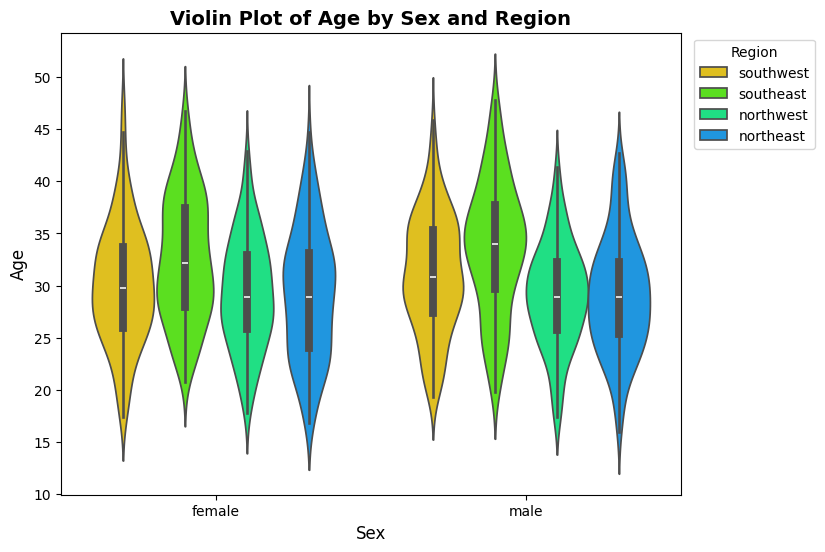

In [63]:
# Create a violin plot with hue to compare male and female
plt.figure(figsize=(8, 6))
sns.violinplot(data=df_for_bivariate_analysis, x='sex', y='bmi', hue='region')
plt.title('Violin Plot of Age by Sex and Region', fontsize=14, weight='bold')
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.legend(title='Region', loc='upper left', bbox_to_anchor=(1.01, 1), fontsize=10)
plt.show()

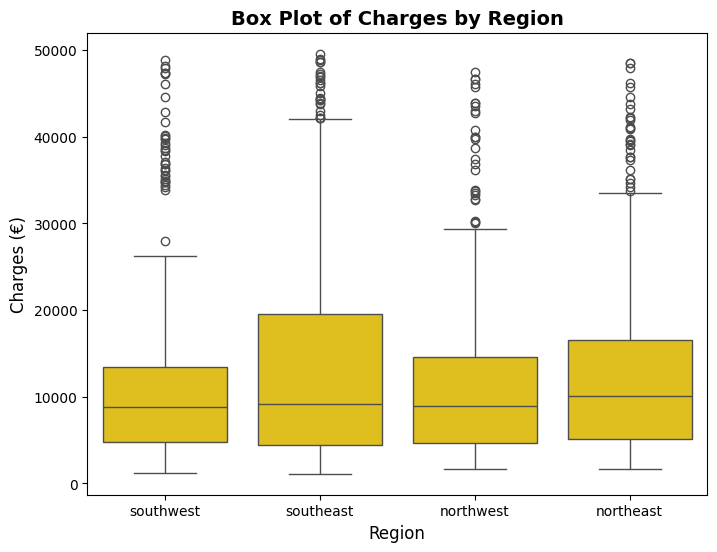

In [64]:
# Create a box plot to compare charges across regions
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_for_bivariate_analysis, x='region', y='charges')
plt.title('Box Plot of Charges by Region', fontsize=14, weight='bold')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Charges (€)', fontsize=12)
plt.show()

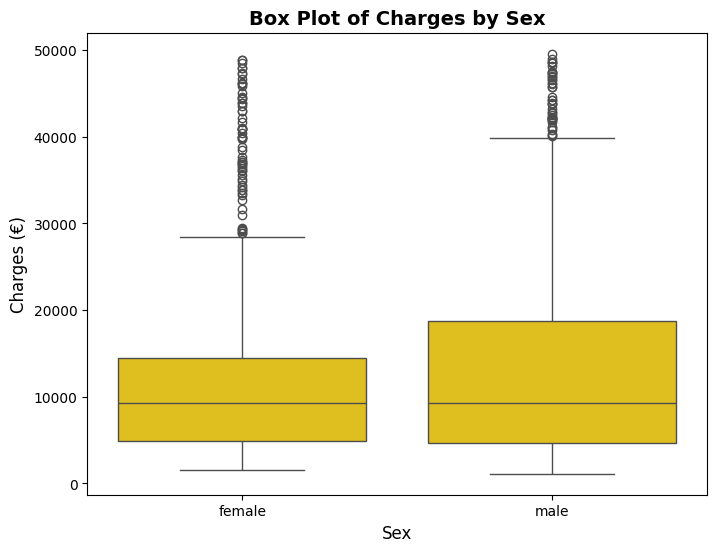

In [65]:
# Create a box plot to compare charges by sex
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_for_bivariate_analysis, x='sex', y='charges')
plt.title('Box Plot of Charges by Sex', fontsize=14, weight='bold')
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Charges (€)', fontsize=12)
plt.show()

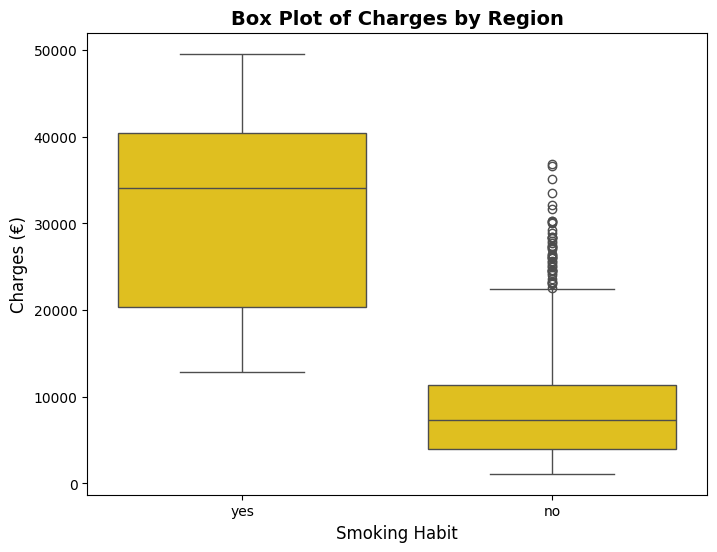

In [66]:
# Create a box plot to compare charges by smoking habit
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_for_bivariate_analysis, x='smoker', y='charges')
plt.title('Box Plot of Charges by Region', fontsize=14, weight='bold')
plt.xlabel('Smoking Habit', fontsize=12)
plt.ylabel('Charges (€)', fontsize=12)
plt.show()

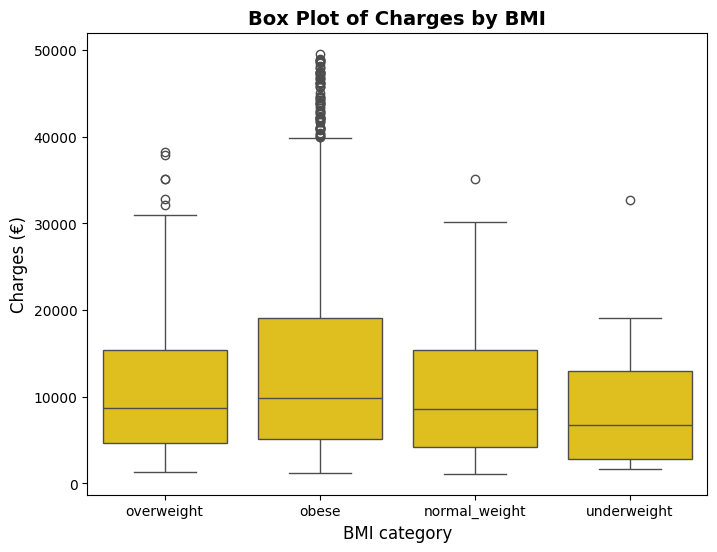

In [67]:
# Create a box plot to compare charges by BMI categoty
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_for_bivariate_analysis, x='weight_category', y='charges')
plt.title('Box Plot of Charges by BMI', fontsize=14, weight='bold')
plt.xlabel('BMI category', fontsize=12)
plt.ylabel('Charges (€)', fontsize=12)
plt.show()

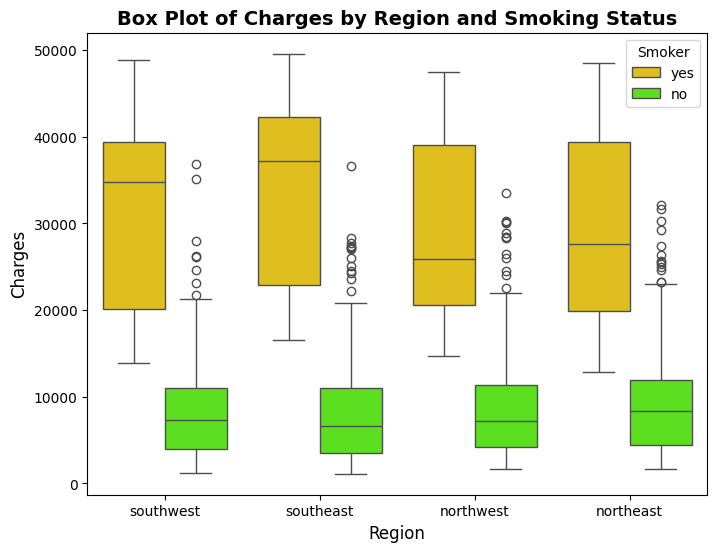

In [68]:
# Create a box plot with hue to compare smokers and non-smokers
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_for_bivariate_analysis, x='region', y='charges', hue='smoker')
plt.title('Box Plot of Charges by Region and Smoking Status', fontsize=14, weight='bold')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Charges', fontsize=12)
plt.legend(title='Smoker', fontsize=10)
plt.show()

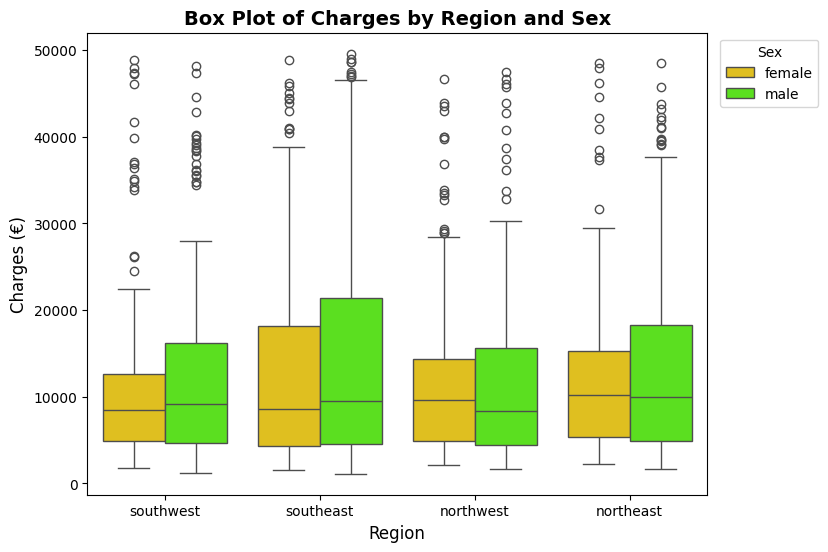

In [69]:
# Create a box plot with hue to compare male and female
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_for_bivariate_analysis, x='region', y='charges', hue='sex')
plt.title('Box Plot of Charges by Region and Sex', fontsize=14, weight='bold')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Charges (€)', fontsize=12)
plt.legend(title='Sex', loc='upper left', bbox_to_anchor=(1.01, 1), fontsize=10)
plt.show()

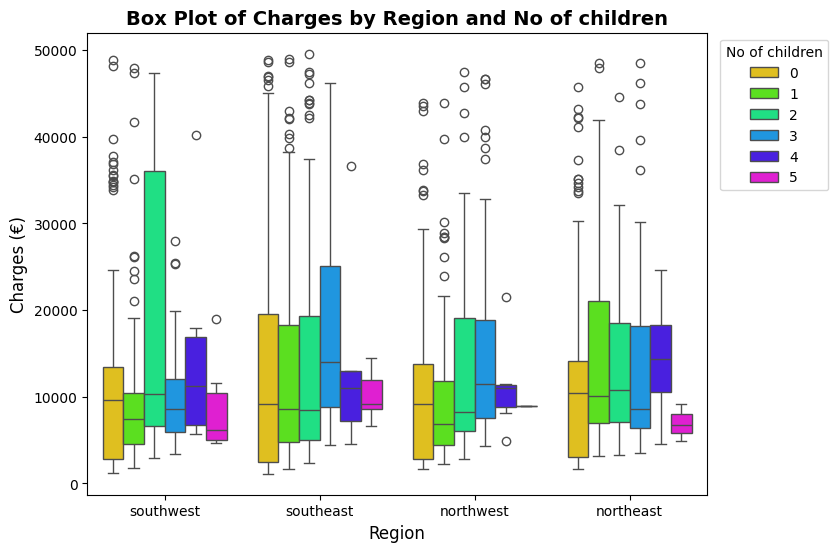

In [70]:
# Create a box plot with hue to compare male and female
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_for_bivariate_analysis, x='region', y='charges', hue='children', palette=colors)
plt.title('Box Plot of Charges by Region and No of children', fontsize=14, weight='bold')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Charges (€)', fontsize=12)
plt.legend(title='No of children', loc='upper left', bbox_to_anchor=(1.01, 1), fontsize=10)
plt.show()

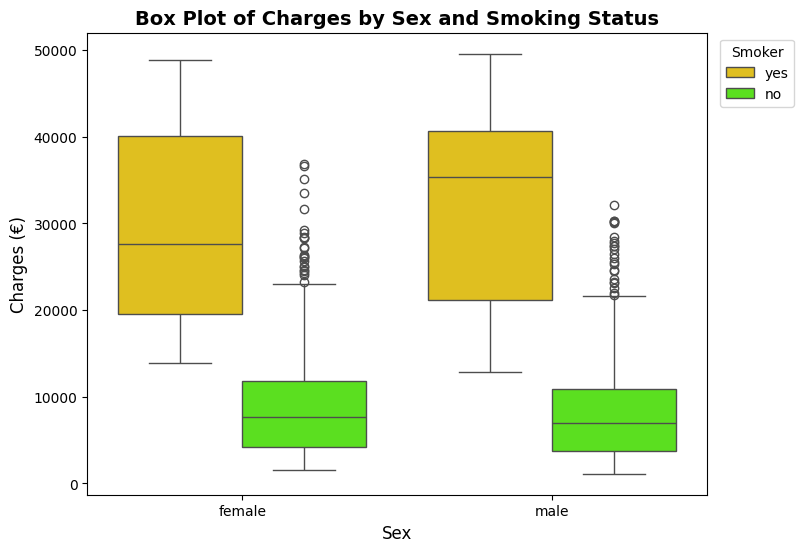

In [71]:
# Create a box plot with hue to compare male and female
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_for_bivariate_analysis, x='sex', y='charges', hue='smoker')
plt.title('Box Plot of Charges by Sex and Smoking Status', fontsize=14, weight='bold')
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Charges (€)', fontsize=12)
plt.legend(title='Smoker', loc='upper left', bbox_to_anchor=(1.01, 1), fontsize=10)
plt.show()

6. **Validation des hypothèses :** Utilisez des tests statistiques.

In [72]:
from scipy.stats import ttest_ind

# Hypotheses
# H0: Being a smoker does not affect charges
# H1: Being a smoker affects charges

# Divide charges into groups by smoking habit
smoker_charges = df_for_bivariate_analysis[df_for_bivariate_analysis['smoker'] == 'yes']['charges']
non_smoker_charges = df_for_bivariate_analysis[df_for_bivariate_analysis['smoker'] == 'no']['charges']

# Perform t-test
t_stat, p_value = ttest_ind(smoker_charges, non_smoker_charges)

# Results
print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Reject H0: Being a smoker significantly affects charges.")
else:
    print("Fail to reject H0: No evidence that being a smoker affects charges.")


T-statistic: 46.088823296899065, P-value: 1.783419576807826e-277
Reject H0: Being a smoker significantly affects charges.


In [73]:
from scipy.stats import f_oneway

# Hypotheses
# H0: Age does not affect charges
# H1: Age affects charges

# Divide charges into groups by age
young_adult_charges = df_for_cor[(df_for_cor['age'] >= 18) & (df_for_cor['age'] < 26)]['charges']
early_adulthood_charges = df_for_cor[(df_for_cor['age'] >= 26) & (df_for_cor['age'] < 36)]['charges']
mid_adulthood_charges = df_for_cor[(df_for_cor['age'] >= 36) & (df_for_cor['age'] < 46)]['charges']
late_adulthood_charges = df_for_cor[(df_for_cor['age'] >= 46) & (df_for_cor['age'] < 60)]['charges']

# Perform one-way ANOVA
f_stat, p_value = f_oneway(young_adult_charges, early_adulthood_charges, 
                           mid_adulthood_charges, late_adulthood_charges)

# Results
print(f"F-statistic: {f_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Reject H0: Age category significantly affects charges.")
else:
    print("Fail to reject H0: No evidence that Age category affects charges.")



F-statistic: 26.37278235130413, P-value: 1.5900161982480523e-16
Reject H0: Age category significantly affects charges.


In [74]:
# Hypotheses
# H0: BMI category does not affect charges
# H1: BMI category affects charges

# Divide charges into groups by BMI
underweight_charges = df_for_cor[df_for_cor['is_underweight'] == 1]['charges']
normal_charges = df_for_cor[df_for_cor['is_normal_weight'] == 1]['charges']
overweight_charges = df_for_cor[df_for_cor['is_overweight'] == 1]['charges']
obese_charges = df_for_cor[df_for_cor['is_obese'] == 1]['charges']

# Perform one-way ANOVA
f_stat, p_value = f_oneway(underweight_charges, normal_charges, overweight_charges, obese_charges)

# Results
print(f"F-statistic: {f_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Reject H0: BMI category significantly affects charges.")
else:
    print("Fail to reject H0: No evidence that BMI category affects charges.")

F-statistic: 16.698690999492527, P-value: 1.1891759549065793e-10
Reject H0: BMI category significantly affects charges.


In [75]:
# Hypotheses
# H0: Number of children does not affect charges
# H1: Number of children of children affects charges

# Divide charges into groups by number of children
no_children_charges = df_for_cor[df_for_cor['children'] == 0]['charges']
one_child_charges = df_for_cor[df_for_cor['children'] == 1]['charges']
two_children_charges = df_for_cor[df_for_cor['children'] == 2]['charges']
three_children_charges = df_for_cor[df_for_cor['children'] == 3]['charges']
four_children_charges = df_for_cor[df_for_cor['children'] == 4]['charges']
five_children_charges = df_for_cor[df_for_cor['children'] == 5]['charges']

# Perform one-way ANOVA
f_stat, p_value = f_oneway(no_children_charges, one_child_charges, two_children_charges, three_children_charges,
                          four_children_charges, five_children_charges)

# Results
print(f"F-statistic: {f_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Reject H0: Number of children significantly affects charges.")
else:
    print("Fail to reject H0: No evidence that the number of children affects charges.")

F-statistic: 3.9566144222412842, P-value: 0.0014481353872127616
Reject H0: Number of children significantly affects charges.


In [76]:
# Hypotheses
# H0: Region does not affect charges
# H1: Region affects charges

# Divide charges into groups by number of children
southwest_charges = df_for_cor[df_for_cor['region'] == "southwest"]['charges']
southeast_charges = df_for_cor[df_for_cor['region'] == "southeast"]['charges']
northwest_charges = df_for_cor[df_for_cor['region'] == "northwest"]['charges']
northeast_charges = df_for_cor[df_for_cor['region'] == "northeast"]['charges']

# Perform one-way ANOVA
f_stat, p_value = f_oneway(southwest_charges, southeast_charges, northwest_charges, northeast_charges)

# Results
print(f"F-statistic: {f_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Reject H0: Region significantly affects charges.")
else:
    print("Fail to reject H0: No evidence that Region affects charges.")

F-statistic: 3.1680187862303972, P-value: 0.02361350427614426
Reject H0: Region significantly affects charges.


In [77]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform post-hoc analysis by smoking habit
posthoc_smoker = pairwise_tukeyhsd(df_for_cor['charges'], df_for_cor['smoker'])

print(posthoc_smoker )

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper   reject
----------------------------------------------------------
     0      1 22885.4552   0.0 21911.3425 23859.568   True
----------------------------------------------------------


In [78]:
# Categorize age category
def categorize_age(age):
    if 18 < age < 26:
        return 'young_adult'
    elif 26 <= age < 36:
        return 'early_adulthood'
    elif 36 <= age < 46:
        return 'mid_adulthood'
    else:
        return 'late_adulthood'

df_for_cor['age_category'] = df_for_cor['age'].apply(categorize_age)

In [79]:
# Perform post-hoc analysis by age
posthoc_age = pairwise_tukeyhsd(df_for_cor['charges'], df_for_cor['age_category'])

print(posthoc_age)

             Multiple Comparison of Means - Tukey HSD, FWER=0.05             
     group1         group2      meandiff  p-adj    lower      upper    reject
-----------------------------------------------------------------------------
early_adulthood late_adulthood  5800.1266    0.0  3619.5442  7980.7089   True
early_adulthood  mid_adulthood  3315.0874 0.0047   767.3738   5862.801   True
early_adulthood    young_adult  -439.6301 0.9731 -3062.4145  2183.1542  False
 late_adulthood  mid_adulthood -2485.0392 0.0184 -4671.2518  -298.8265   True
 late_adulthood    young_adult -6239.7567    0.0 -8513.0097 -3966.5037   True
  mid_adulthood    young_adult -3754.7175 0.0014 -6382.1848 -1127.2502   True
-----------------------------------------------------------------------------


In [80]:
# Perform post-hoc analysis by bmi
posthoc_bmi = pairwise_tukeyhsd(df_for_cor['charges'], df_for_cor['bmi_category'])

print(posthoc_bmi)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
    group1       group2    meandiff  p-adj     lower      upper    reject
-------------------------------------------------------------------------
normal_weight       obese  4731.2487    0.0    2466.496  6996.0015   True
normal_weight  overweight    578.172 0.9319   -1898.373  3054.7171  False
normal_weight underweight -1557.1361 0.9377  -8446.6302  5332.3579  False
        obese  overweight -4153.0767    0.0  -6027.3691 -2278.7843   True
        obese underweight -6288.3849 0.0747 -12985.0127    408.243  False
   overweight underweight -2135.3082 0.8492  -8906.4968  4635.8804  False
-------------------------------------------------------------------------


In [81]:
# Perform post-hoc analysis by region
posthoc_region = pairwise_tukeyhsd(df_for_cor['charges'], df_for_cor['region'])

print(posthoc_region)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
  group1    group2   meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------------
northeast northwest -1140.5199 0.5996 -3500.9015 1219.8617  False
northeast southeast  1184.7849 0.5478 -1117.2747 3486.8445  False
northeast southwest -1176.3894 0.5746  -3536.771 1183.9922  False
northwest southeast  2325.3049 0.0464    25.1221 4625.4876   True
northwest southwest   -35.8694    1.0 -2394.4206 2322.6817  False
southeast southwest -2361.1743 0.0416 -4661.3571  -60.9916   True
-----------------------------------------------------------------


In [82]:
# Perform post-hoc analysis by number of children
posthoc_children = pairwise_tukeyhsd(df_for_cor['charges'], df_for_cor['children'])

print(posthoc_children)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj     lower      upper   reject
------------------------------------------------------------
     0      1   338.2211 0.9984   -1978.962 2655.4043  False
     0      2   3034.778 0.0094    478.7437 5590.8123   True
     0      3  3006.6105 0.0487      9.9617 6003.2593   True
     0      4    1788.27  0.975  -4986.3697 8562.9097  False
     0      5 -3276.3512 0.8474 -11213.0778 4660.3753  False
     1      2  2696.5569 0.0729   -137.6725 5530.7862  False
     1      3  2668.3894 0.1741   -568.8083  5905.587  False
     1      4  1450.0489  0.991  -5434.3747 8334.4724  False
     1      5 -3614.5724 0.7936  -11645.212 4416.0672  False
     2      3   -28.1675    1.0  -3440.4135 3384.0784  False
     2      4  -1246.508 0.9958  -8214.9556 5721.9396  False
     2      5 -6311.1293 0.2278 -14413.9156 1791.6571  False
     3      4 -1218.3405 0.9966  -8360.1788 5923.4978  False
     3      5 -6282.9618

In [83]:
# charges_std vs smokers(0.78),  age_std (0.31), bmi_std(0.19),
# charges_log vs smokers(0.66), age_log(0.54), children_log(0.18), bmi_log(0.14)

In [95]:
# Seelect features for ML model
model_data = df_for_cor[['charges', 'charges_log', 'smoker_log', 'age_log', 'children_log', 'bmi_log']]

In [96]:
model_data

,charges,charges_log,smoker_log,age_log,children_log,bmi_log
0,16884.92,9.734235,0.693147,2.995732,0.000000,3.363842
1,1725.55,7.453880,0.000000,2.944439,0.693147,3.548755
2,4449.46,8.400763,0.000000,3.367296,1.386294,3.526361
3,21984.47,9.998137,0.000000,3.526361,0.000000,3.165475
4,3866.86,8.260457,0.000000,3.496508,0.000000,3.397189
...,...,...,...,...,...,...
1321,10600.55,9.268755,0.000000,3.931826,1.386294,3.464798
1322,2205.98,7.699380,0.000000,2.944439,0.000000,3.494080
1323,1629.83,7.396844,0.000000,2.944439,0.000000,3.633631
1324,2007.94,7.605362,0.000000,3.091042,0.000000,3.288402


In [97]:
# Export model dataset
model_data.to_csv("model_dataset.csv")